<a href="https://colab.research.google.com/github/valmirf/redes_neurais_esp/blob/main/Perceptron/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/valmirf/redes_neurais_esp.git

fatal: destination path 'redes_neurais_esp' already exists and is not an empty directory.


# **Código da Rede Neural Perceptron**

Abaixo é apresentado um código do perceptron. Prestem atenção nas equações e etapas de treinamento.


##Somatório:



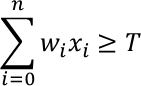


##Atualização dos Pesos:

Δ𝑤_𝑖=𝜂(𝑡−𝑜)𝑥_𝑖

𝑤_(𝑖+1)=𝑤_𝑖+Δ𝑤_𝑖

## Parâmetros: 
𝑛 = Número de exemplos

𝑥_𝑖= Vetor de características do exemplo 𝑖

𝑤_𝑖= Peso da conexão 𝑖

𝑇 = Limiar

In [3]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=0.2, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)
           
    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        #print(summation)
        if summation >= self.threshold:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label - prediction) * inputs
                #w_(i+1) = w_i + delta 
                self.weights += delta


#Exemplo dado em Sala de Aula:

##Operador AND



In [4]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 1

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 0

weights_and_1 = perceptron.weights

1
0




---


#Exercícios:

1. Altere o código abaixo e rode para apenas uma execução. Qual o resultado para [1,1] e [0,1]?



In [5]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0])

perceptron = Perceptron(2, nIterations=1)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 1

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 0

weights_and_2 = perceptron.weights

0
0


2. Altere o código abaixo para o operador XOR. Deixe os parâmetros no padrão. Qual o resultado para [1,1] e [0,1]? 

3. Porque o resultado deu errado na questão anterior?

In [6]:
training_inputs = []
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([0, 1, 1, 0])

perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)

inputs = np.array([1, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 1

inputs = np.array([0, 1])
p = perceptron.predict(inputs) 
print(p)
#=> 0

weights_xor = perceptron.weights

print("\n3. Porque o resultado deu errado na questão anterior?")
print("O número de iterações não foi o suficiente para o Perceptron encontrar os pesos ótimos.")
print("Pesos do primeiro AND Perceptron:",weights_and_1)
print("Pesos do segundo AND Perceptron:", weights_and_2)
print("Pesos do XOR Perceptron:", weights_xor)

1
0

3. Porque o resultado deu errado na questão anterior?
O número de iterações não foi o suficiente para o Perceptron encontrar os pesos ótimos.
Pesos do primeiro AND Perceptron: [0.11 0.11]
Pesos do segundo AND Perceptron: [0.01 0.01]
Pesos do XOR Perceptron: [0.11 0.11]


4. Atualize a função de ativação do perceptron para a função sigmóide. 

OBS: Essa atualização fará o Percetron se transformar na Rede Neural Adaline, que utiliza uma função de ativação contínua ao invés de uma função limiar binária.

In [7]:
import numpy as np

class Perceptron_to_Adaline(object):

    def __init__(self, no_of_inputs, threshold=0.5, nIterations=100, learning_rate=0.01):
        self.nIterations = nIterations
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs)
           
    def predict(self, inputs):
        #.dot = produto de dois arrays (somatório entre entrada e peso)
        summation = np.dot(inputs, self.weights)
        #print("summation:", summation)
        summation = 1/(1 + np.exp(-summation))
        if summation >= self.threshold:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.nIterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                #delta = w_i + n*(t-o)*x
                delta = self.learning_rate * (label - prediction) * inputs
                #w_(i+1) = w_i + delta 
                self.weights += delta


5. Agora, altere o código para que execute a base de dados Diabetes como Entrada. Avalie os hiperparâmetros abaixo nas redes Perceptron e Adaline, e diga a taxa de acerto no conjunto de testes pra cada configuração.
a) Taxa de Aprendizado = 0.01 e Limiar= 0.2
b) Taxa de Aprendizado = 0.1 e Limiar= 0.2
c) Taxa de Aprendizado = 0.01 e Limiar= 0.5
d) Taxa de Aprendizado = 0.1 e Limiar= 0.5


In [8]:
# Neste código vou utilizar o pandas, framework amplamente utilizado pra lidar com dados
import pandas as pd
from sklearn.model_selection import train_test_split

#carrega a base de dados e retorna conjuntos de treinamento e teste
def load_data():
    url = 'redes_neurais_esp/Perceptron/diabetes.csv'
    df = pd.read_csv(url)
    #remove a ultima coluna (dados)
    data = df[df.columns[:-1]]
    #normaliza os dados
    normalized_data = (data - data.min()) / (data.max() - data.min())
    #retorna a última coluna (rótulos)
    labels = df[df.columns[-1]]
    #separa em conjunto de treinamento e teste com seus respectivos rótulos
    X_train, X_test, y_train, y_test = train_test_split(normalized_data, labels, test_size=0.2, random_state=0)
    
    return X_train, X_test, y_train, y_test

#chama função que carrega base de dados
training_inputs, test_inputs, training_labels, test_labels = load_data()

#Treina Perceptron
perceptron = Perceptron(8)
perceptron.train(training_inputs.values, training_labels.values)

#Avalia primeiro elemento do conjunto de testes
p = perceptron.predict(test_inputs.iloc[0].values) 
print('predicted: ', p)
print('label: ', test_labels.iloc[0])




predicted:  1
label:  1


In [9]:
def testing(model, my_inputs, my_labels):
  errors = list()
  for input, label in zip(my_inputs, my_labels):
    output = model.predict(input)
    if(output != label):
      errors.append((output, label))
  error_rate = len(errors) / len(my_labels)
  hit_rate = 1 - error_rate
  print('Total de entradas: {}\nTotal de Erros: {}\nTaxa de erro: {}\nTaxa de Acerto: {}'.format(len(my_labels), len(errors), error_rate, hit_rate))

  #return errors, my_labels

In [10]:
taxas_aprendizado = [0.01, 0.1, 0.01, 0.1]
limiares = [0.2, 0.2, 0.5, 0.5]

for taxa_aprendizado, limiar in zip(taxas_aprendizado, limiares):
  print('#################')
  print('Treinando Perceptron com Taxa de Aprendizado: {} e Limiar: {}'.format(taxa_aprendizado, limiar))
  perceptron = Perceptron(8, learning_rate=taxa_aprendizado, threshold=limiar)
  perceptron.train(training_inputs.values, training_labels.values)
  testing(perceptron, test_inputs.values, test_labels.values)
  print()

#################
Treinando Perceptron com Taxa de Aprendizado: 0.01 e Limiar: 0.2
Total de entradas: 154
Total de Erros: 39
Taxa de erro: 0.2532467532467532
Taxa de Acerto: 0.7467532467532467

#################
Treinando Perceptron com Taxa de Aprendizado: 0.1 e Limiar: 0.2
Total de entradas: 154
Total de Erros: 42
Taxa de erro: 0.2727272727272727
Taxa de Acerto: 0.7272727272727273

#################
Treinando Perceptron com Taxa de Aprendizado: 0.01 e Limiar: 0.5
Total de entradas: 154
Total de Erros: 36
Taxa de erro: 0.23376623376623376
Taxa de Acerto: 0.7662337662337663

#################
Treinando Perceptron com Taxa de Aprendizado: 0.1 e Limiar: 0.5
Total de entradas: 154
Total de Erros: 39
Taxa de erro: 0.2532467532467532
Taxa de Acerto: 0.7467532467532467



In [11]:
taxas_aprendizado = [0.01, 0.1, 0.01, 0.1]
limiares = [0.2, 0.2, 0.5, 0.5]

for taxa_aprendizado, limiar in zip(taxas_aprendizado, limiares):
  print('#################')
  print('Treinando Adaline com Taxa de Aprendizado: {} e Limiar: {}'.format(taxa_aprendizado, limiar))
  adaline = Perceptron_to_Adaline(8, learning_rate=taxa_aprendizado, threshold=limiar)
  adaline.train(training_inputs.values, training_labels.values)
  testing(adaline, test_inputs.values, test_labels.values)
  print()

#################
Treinando Adaline com Taxa de Aprendizado: 0.01 e Limiar: 0.2
Total de entradas: 154
Total de Erros: 87
Taxa de erro: 0.564935064935065
Taxa de Acerto: 0.43506493506493504

#################
Treinando Adaline com Taxa de Aprendizado: 0.1 e Limiar: 0.2
Total de entradas: 154
Total de Erros: 90
Taxa de erro: 0.5844155844155844
Taxa de Acerto: 0.4155844155844156

#################
Treinando Adaline com Taxa de Aprendizado: 0.01 e Limiar: 0.5
Total de entradas: 154
Total de Erros: 44
Taxa de erro: 0.2857142857142857
Taxa de Acerto: 0.7142857142857143

#################
Treinando Adaline com Taxa de Aprendizado: 0.1 e Limiar: 0.5
Total de entradas: 154
Total de Erros: 44
Taxa de erro: 0.2857142857142857
Taxa de Acerto: 0.7142857142857143

